# KL Divergece



주어진 랜덤 변수에 대한 확률 분포 간의 차이를 정량화하는 것이 바람직하다. 주로 관측된 분포와 실제 분포와의 차이를 계산 할 때 자주 등장하는 개념이다.

이는 Kullback-Leibler Difference(KL difference, KL difference) 또는 상대적 엔트로피와 KL difference의 정규화되고 대칭적인 버전을 제공하는 Jensen-Shannon difference와 같은 정보 이론의 기법을 사용하여 달성할 수 있다. 이러한 채점 방법은 모델링 전 형상 선택을 위한 상호 정보, 여러 가지 다른 분류기 모델의 손실 함수로 사용되는 교차 엔트로피와 같이 널리 사용되는 다른 방법의 계산의 지름길로 사용될 수 있다.

이 노트북에서 알게 될 것들은,
- 통계적 거리(Statistical distance)는 랜덤 변수에 대한 다른 확률 분포와 같은 통계적 개체 간의 차이를 계산하는 일반적인 방법이다.
- Kullback-Leibler difference는 한 확률 분포와 다른 확률 분포의 차이를 측정하는 점수를 계산한다.
- Jensen-Shannon 분산은 KL 분산에서 더 나아가 한 확률 분포의 대칭 점수와 거리 측정을 계산한다.

## 통계적 거리(Statistical Distance)


두 확률 분포를 비고 하고 싶은 상황은 많다. 특히, 실제 분포와 해당 분포의 근사치 등 변수에 대한 단일 랜덤 변수와 두 가지 다른 확률 분포를 가질 수 있다.

이 상황에선, 두 분포 사이의 차이를 정량화하는 것이 유용할 수 있다. 일반적으로 이것은 확률분포와 같은 두 통계적 객체 사이의 통계적 거리를 계산하는 문제로 언급된다.

한 가지 접근방식은 두 분포 사이의 거리 측정값을 계산하는 것이다. 이것은 측정치를 해석하기 어려울 수 있기 때문에 어려울 수 있다.

대신에, 두 분포 사이의 차이를 계산하는 것이 더 흔한 방법이다. 차이점(Divergence)은 척도와 같으나 대칭적이지 않다.(A-B != B-A) 즉, 분포 P와 Q에 대한 차이를 계산하면 Q와 P와 다른 점수를 얻을 수 있는 분포의 차이를 점수화한 것이다.

차이 점수(Divergence scores)는 정 보이론과 더 일반적으로 기계학습에서 많은 다른 계산을 위한 중요한 기초가 된다. 예를 들어, 그들은 분류 모델의 손실 함수로 사용되는 교차 엔트로피와 상호 정보(정보 이득) 같은 점수를 계산하는 지름길을 제공한다.

차이 점수는 생성 대립 네트워크(GAN) 모델을 최적화할 때 목표 확률 분포를 근사화하는 등 복잡한 모델링 문제를 이해하기 위한 도구로도 직접 사용된다.

정보 이론으로부터 사용되는 두개의 흔한 차이는 Kullback-Leibler Divergence와 Jensen-Shannon Divergence이다.

---

## Kullback - Leibler Divergence

KL divergene score 는 하나의 확률분포가 다른 확률분포와 얼마나 다른지 정량화한다.

두 확률분포 Q와 P 사이의 KL divergence는 이렇게 적히기도 한다.
- KL(P || Q)

여기서 "||" 연산자는 Q로부터의 "분산" 또는 Ps 분산을 나타낸다.

KL Divergence는 P에서 각 사건의 확률에 대한 음의 합계에 P에서 사건의 확률에 대한 Q의 로그에 곱한 값으로 계산할 수 있다.
- KL(P || Q) = – sum x in X P(x) * log(Q(x) / P(x))

합계 내의 값은 주어진 사건에 대한 차이점이다.

이는 P의 각 사건 확률에 Q의 사건 확률에 대해 P의 사건 확률 일지를 곱한 양의 합과 같다. 이것은 실무에서 더 많이 쓰이는 구현이다.
- KL(P || Q) = sum x in X P(x) * log(P(x) / Q(x))

KL divergence 점수에 대한 직관은 P로부터의 사건 확률은 크지만 Q의 동일한 사건 확률은 작을 때 큰 차이가 있다는 것이다. P로부터의 확률은 적고 Q로부터의 확률은 클 때, 역시 큰 차이가 있지만, 첫 번째 사례만큼 크지는 않다.

이산형 확률 분포와 연속형 확률 분포 사이의 차이를 측정하는 데 사용할 수 있으며, 후자의 경우 이산형 사건의 확률 합계가 아니라 사건의 적분을 계산한다.

KL divergense는 대칭이 아니다.
- KL(P || Q) != KL(Q || P)

---

예시
- 세 개의 사건이 있는 랜덤 변수를 다른 색상으로 간주한다. 이 변수에 대해 두 가지 다른 확률 분포를 가질 수 있다. 

In [ ]:
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

확률 히스토그램으로 직접 비교하기 위해 이러한 확률의 막대 차트를 그릴 수 있다.

P=1.000 Q=1.000


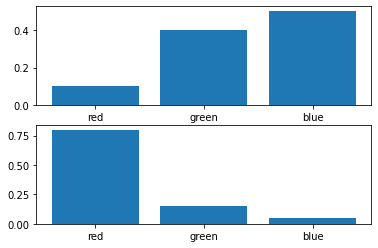

In [ ]:
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

다음 순서로, 두 분포 사이의 KL divergence를 계산하는 함수를 만들 수 있다.
- 로그 베이스-2를 사용하여 결과가 비트 단위를 갖도록 하자.

In [ ]:
# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [ ]:
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits


In [ ]:
# example of calculating the kl divergence between two mass functions
from math import log2
 
# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
 
# define distributions
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits


Scipy 라이브러리에서는 Kl_div() 함수(위에서 쓴 공식과는 다름)를 제공해준다. 또한,  rel_entr() 함수(위에서 공부한 KL divergence와 같은 공식, "relative entropy")를 제공한다.

rel_entr() 함수는 각 확률 분포의 모든 사건에 걸친 확률 list를 인수로 삼고 각 사건에 대한 다이버전스 list를 반환한다. 반환된 list를 합치면 KL의 차이를 알 수 있다. 이 계산은 로그 base-2 대신 자연로그를 사용하므로 단위는 비트 대신 nats로 한다.

In [ ]:
# example of calculating the kl divergence (relative entropy) with scipy
from scipy.special import rel_entr
# define distributions
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate (P || Q)
kl_pq = rel_entr(p, q)
print('KL(P || Q): %.3f nats' % sum(kl_pq))
# calculate (Q || P)
kl_qp = rel_entr(q, p)
print('KL(Q || P): %.3f nats' % sum(kl_qp))

KL(P || Q): 1.336 nats
KL(Q || P): 1.401 nats


---

## Jensen-Shannon Divergence

Jensen-Shannon Divergence는 두 확률분포의 차이를 정량화하는 또다른 방법이다.

대칭인 정규화된 점수를 계산하기위해 KL divergence를 사용한다. 즉, Q로부터의 P의 차이가 P로부터의 Q와 같다는 것!
- JS(P || Q) == JS(Q || P)
- JS(P || Q) = 1/2 * KL(P || M) + 1/2 * KL(Q || M)
- M = 1/2 * (P + Q)

베이스2 로그를 사용하면 score가 0에서 1사이로 되어, 평탄(smoothed)하고 정규화(normalized)된 KL divergence를 제공하므로, 측정도구로써 유용하다.

score에 제곱근을 하면 차이(divergence)개념에서 거리(distance)개념으로 바뀜.

In [ ]:
# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
 
# calculate the js divergence
def js_divergence(p, q):
	m = 0.5 *(p + q)
	return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

In [ ]:
# calculate JS(P || Q)
import numpy as np
from math import sqrt

js_pq = js_divergence(np.array(p), np.array(q))
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))

js_pq = js_divergence(np.array(q), np.array(p))
print('JS(Q || P) divergence: %.3f bits' % js_pq)
print('JS(Q || P) distance: %.3f' % sqrt(js_pq))

JS(P || Q) divergence: 0.420 bits
JS(P || Q) distance: 0.648
JS(Q || P) divergence: 0.420 bits
JS(Q || P) distance: 0.648


---

정리하자면..
- 통계적 거리(Statistical distance)는 랜덤 변수에 대한 다른 확률 분포와 같은 통계적 개체 간의 차이를 계산하는 일반적인 개념이다.
- Kullback-Leibler divergence는 하나의 확률분포로부터 다른 확률분포의 차이를 계산하는 점수이다.
- Jensen-Shannon divergence는 KL divergence에서 더 나아가, 한 확률 분포의 대칭 점수와 거리 측정을 계산한다.

---

JSD에 기초하여, 계층적 군집분석(hierarchical clustering)을 활용하여 군집 분석을 실행할 수 있음.


---

출처: https://machinelearningmastery.com/divergence-between-probability-distributions/

https://www.researchgate.net/publication/221240314_On_Studying_Partial_Coverage_and_Spatial_Clustering_Based_on_Jensen-Shannon_Divergence_in_Sensor_Networks